In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
disease=pd.read_csv("heart.csv")

In [16]:
disease.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
disease.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [18]:
disease.shape

(303, 14)

In [19]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
disease.head(1)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [21]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
disease.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [26]:
relevent_columns=['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal','target']
correlatiom_matric=disease[relevent_columns].corr()
target_correlation=correlatiom_matric['target']
print(target_correlation)

age                   -0.225439
sex                   -0.280937
chest_pain_type        0.433798
resting_bp            -0.144931
cholestoral           -0.085239
fasting_blood_sugar   -0.028046
restecg                0.137230
max_hr                 0.421741
exang                 -0.436757
oldpeak               -0.430696
slope                  0.345877
num_major_vessels     -0.391724
thal                  -0.344029
target                 1.000000
Name: target, dtype: float64


In [27]:
# Sort the correlation values in descending order based on the absolute value
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlation)


target                 1.000000
exang                  0.436757
chest_pain_type        0.433798
oldpeak                0.430696
max_hr                 0.421741
num_major_vessels      0.391724
slope                  0.345877
thal                   0.344029
sex                    0.280937
age                    0.225439
resting_bp             0.144931
restecg                0.137230
cholestoral            0.085239
fasting_blood_sugar    0.028046
Name: target, dtype: float64


In [28]:
high_correlation = sorted_correlation[sorted_correlation > 0.3]
print(high_correlation)


target               1.000000
exang                0.436757
chest_pain_type      0.433798
oldpeak              0.430696
max_hr               0.421741
num_major_vessels    0.391724
slope                0.345877
thal                 0.344029
Name: target, dtype: float64


In [29]:
disease.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

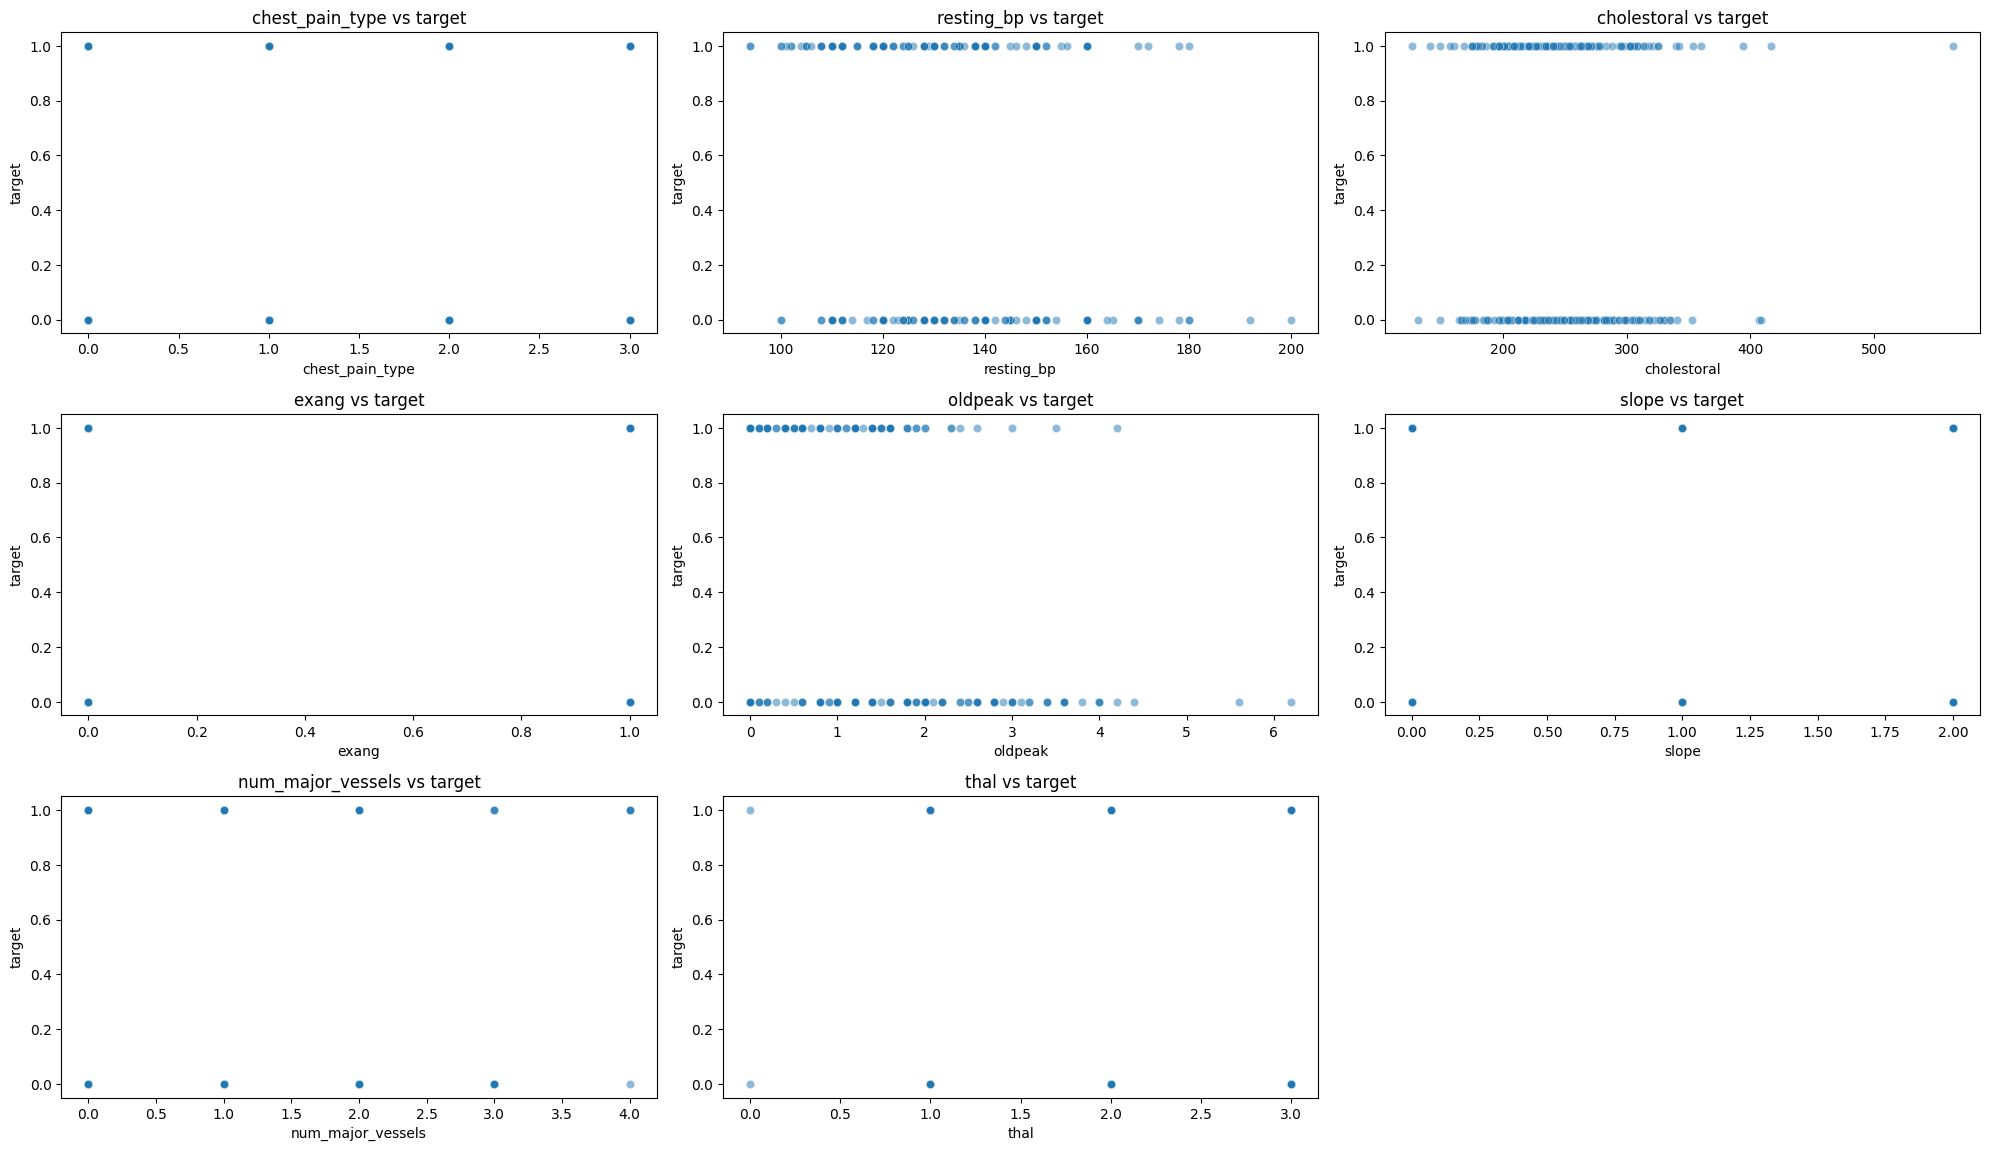

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns you want to plot
columns = [ 'chest_pain_type', 'resting_bp', 'cholestoral',
         'exang', 'oldpeak', 
           'slope', 'num_major_vessels', 'thal']

# Set up the figure with subplots, creating a grid that fits all the columns
fig, axes = plt.subplots(4, 3, figsize=(20, 15))  # Adjust the grid size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a scatter plot
for i, column in enumerate(columns):
    sns.scatterplot(x=column, y='target', data=disease, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{column} vs target')

# Remove any unused subplots if necessary
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


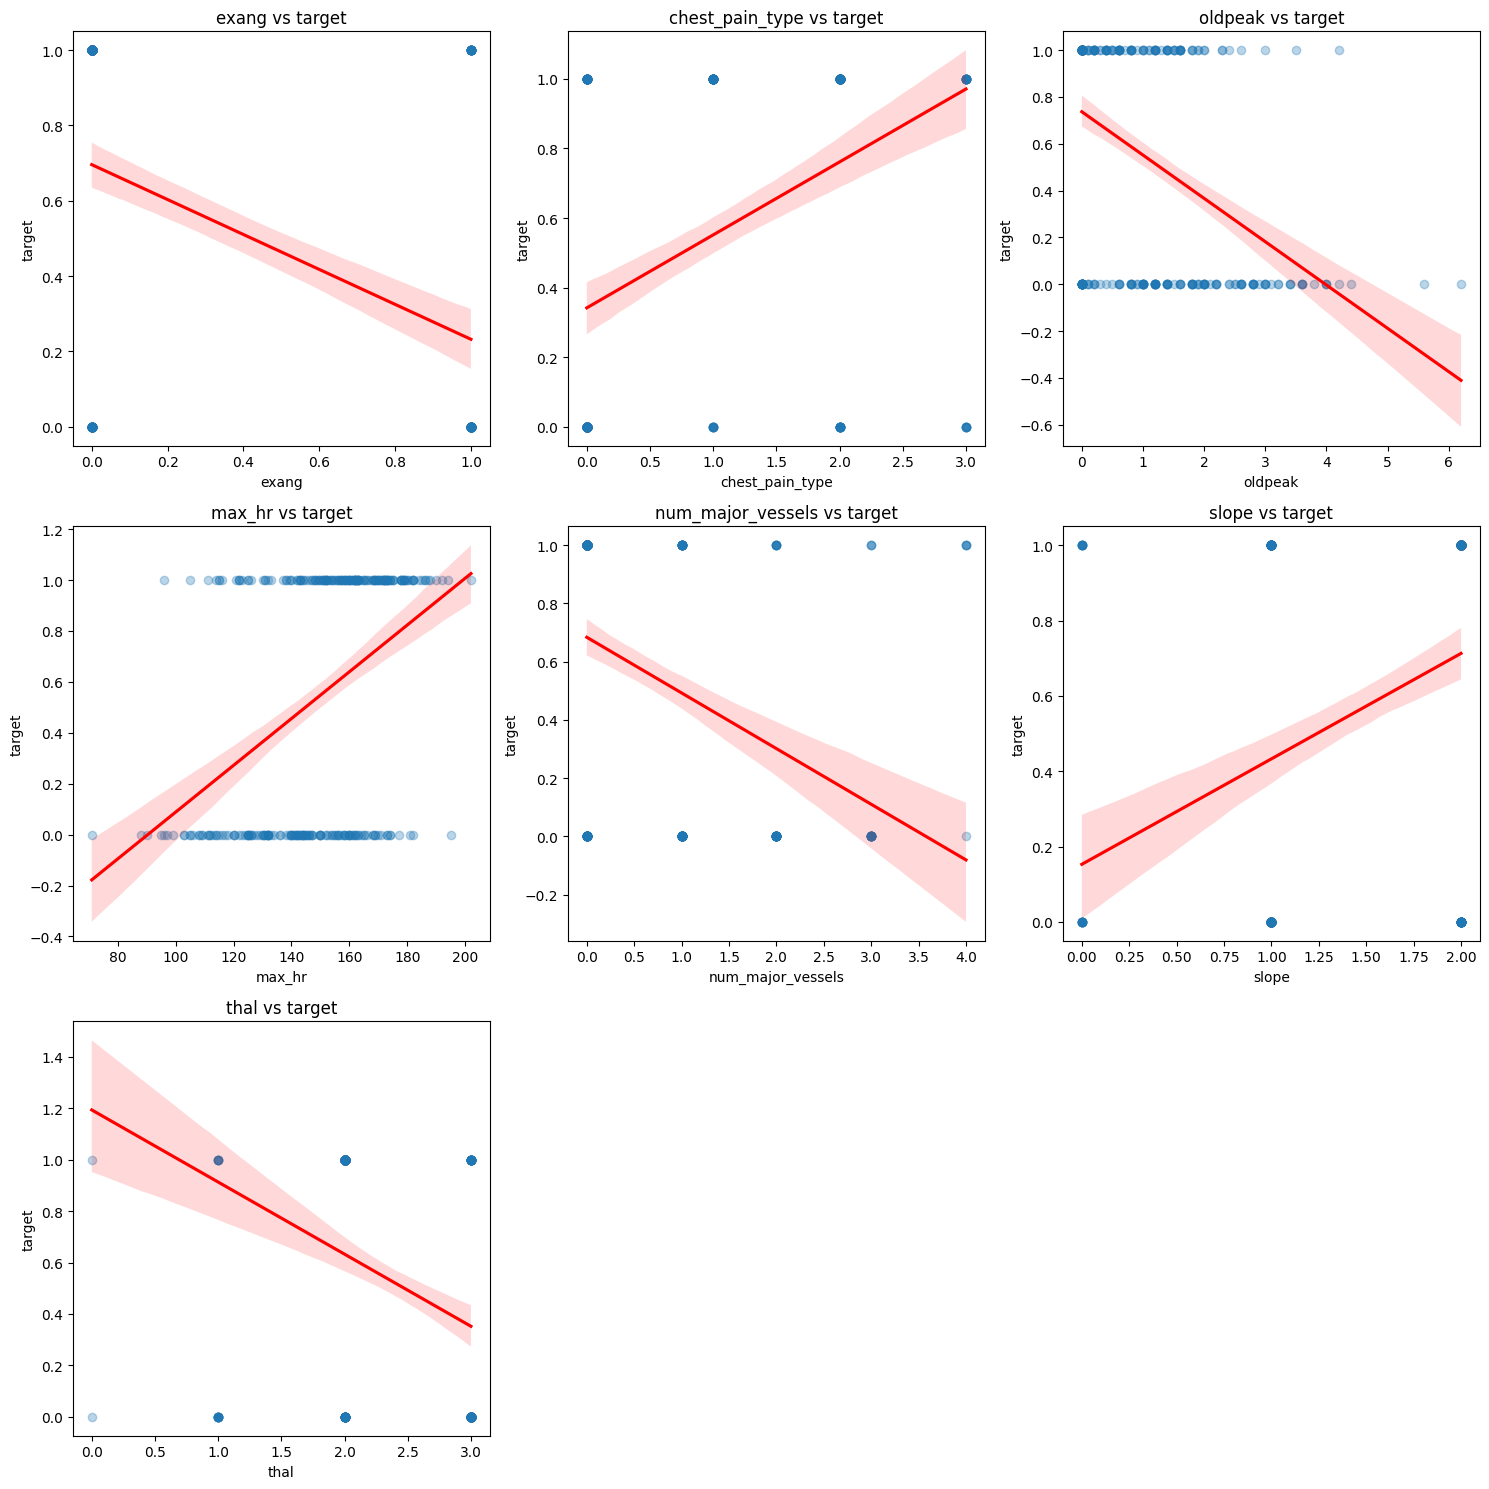

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns you want to plot
columns = ['exang', 'chest_pain_type', 'oldpeak', 'max_hr', 'num_major_vessels', 'slope', 'thal']

# Set up the figure with subplots, creating a grid that fits all the columns
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the grid size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create an lmplot
for i, column in enumerate(columns):
    sns.regplot(x=column, y='target', data=disease, ax=axes[i], 
                scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    axes[i].set_title(f'{column} vs target')

# Remove any unused subplots if necessary
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Step 2-Splitting the dataset into training and testing set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1321)

In [39]:
disease.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [40]:
X=disease[['exang', 'oldpeak',
       'slope', 'num_major_vessels','thal','chest_pain_type','max_hr']]
y=disease['target']

# Step 3-Build a linear model

In [41]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training the model

In [42]:
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Training the Model with multivariable regression using Scikit Learn

In [44]:
lm.coef_

array([-0.18849689, -0.08501796,  0.06752077, -0.09694884, -0.16420822,
        0.11857596,  0.00265685])

In [45]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coef']) # the lenght of member is high correlated with yearly amount spend
print(cdf)

                       Coef
exang             -0.188497
oldpeak           -0.085018
slope              0.067521
num_major_vessels -0.096949
thal              -0.164208
chest_pain_type    0.118576
max_hr             0.002657


# Predicting Test Data
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [46]:
predictions=lm.predict(X_test)

Text(0.5, 1.0, 'predictions vs target')

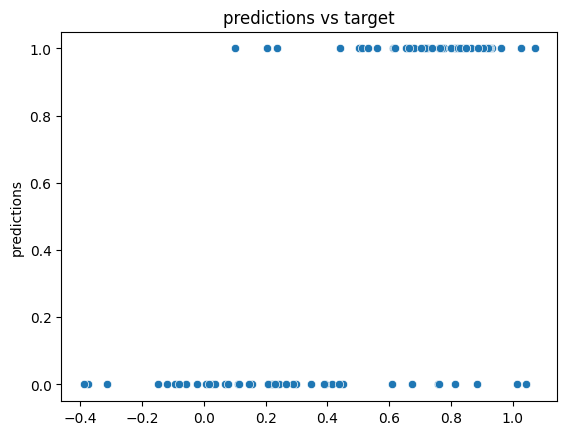

In [49]:
sns.scatterplot(x=predictions,y=y_test)
plt.ylabel("predictions")
plt.title("predictions vs target")

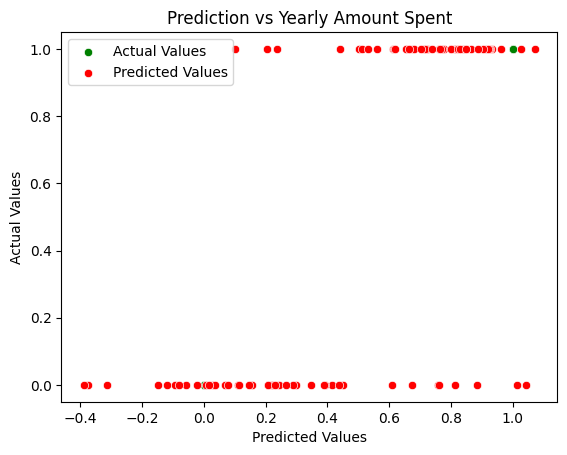

In [50]:
# Plot actual values
sns.scatterplot(x=y_test, y=y_test, color='green', label='Actual Values')

# Plot predicted values
sns.scatterplot(x=predictions, y=y_test, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Prediction vs Yearly Amount Spent")
plt.legend()  # Add a legend to differentiate between the actual and predicted values

plt.show()


# Evaluation of the model

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [52]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.29527865990382846
Mean Squared Error: 0.14305060005316897
Root Mean Squared Error: 0.37822030624117603


# Residuals
Distribution plot of the residuals of the model's predictions. They should be normally distributed.mmm

C:\Users\SAJID\AppData\Local\Temp\ipykernel_3748\2180829625.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='target', ylabel='Density'>

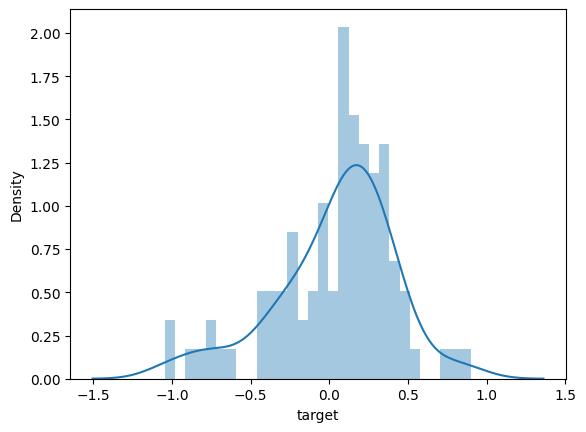

In [53]:

residuals = y_test-predictions
sns.distplot(residuals, bins=30)

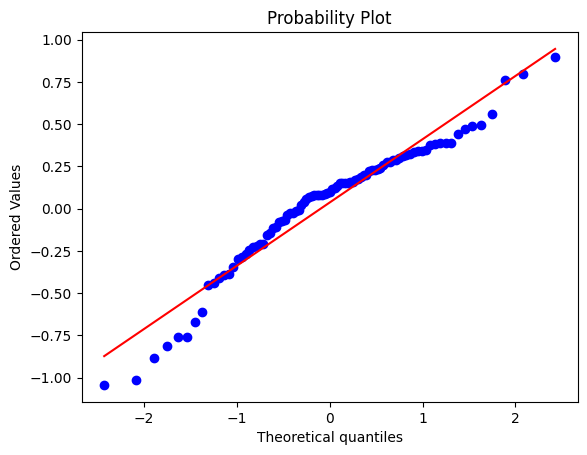

In [54]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [58]:
print('Variance score: %.2f' % lm.score(X_train, y_train))

Variance score: 0.50


In [56]:
print('Variance score: %.2f' % lm.score(X_test, y_test))

Variance score: 0.42
